<a href="https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/tweetpreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# using the politics dataset from github
url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/politics.csv'
tweet_df = pd.read_csv(url)

In [3]:
tweet_df.head()

,id,username,created_at,text,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...",12064,2762


In [4]:
#adding a new column for cleaned tweets
tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,India marks #ParakramDivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,On the way to Kolkata to mark #ParakarmDivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,We are working towards Assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","To build an Aatmanirbhar Bharat, we have to fo...",12064,2762


In [5]:
# changing to lower case 
tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,on the way to kolkata to mark #parakarmdivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,we are working towards assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","to build an aatmanirbhar bharat, we have to fo...",12064,2762


In [6]:
# removing url links
import re #(regex library for regular expressions)

# for urls with http or https
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

#for urls with or without www
tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0      india marks #parakramdivas and pays homage to ...
1      on the way to kolkata to mark #parakarmdivas a...
2      सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...
3      we are working towards assam’s development bas...
4      to build an aatmanirbhar bharat, we have to fo...
                             ...                        
795    complacency towards the air quality of delhi b...
796    chaired a meeting of @delhiassembly's committe...
797    rt @mirrornow: cm's personal &amp; domestic st...
798    rt @mirrornow: yesterday, cm @arvindkejriwal w...
799    rt @timesnow: bjp is afraid of aap leaders tak...
Name: cleaned_tweets, Length: 800, dtype: object

In [7]:
# remove @mention
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,on the way to kolkata to mark #parakarmdivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,we are working towards assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","to build an aatmanirbhar bharat, we have to fo...",12064,2762


In [8]:
# removing html tags that get embedded in tweets during extraction
tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [9]:
# removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# removing digits
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

In [11]:
# remove all remaining characters that aren't letters, white space, or 
# the following #:)(/\='] that are used in emojis or hashtags
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
tweet_df.cleaned_tweets.head()

0    india marks #parakramdivas and pays homage to ...
1    on the way to kolkata to mark #parakarmdivas a...
2                                                     
3    we are working towards assams development base...
4    to build an aatmanirbhar bharat we have to foc...
Name: cleaned_tweets, dtype: object

In [13]:
# remove stopwords
stop_words = set(stopwords.words('english'))
tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

tweet_df.cleaned_tweets.head()

0    india marks #parakramdivas pays homage netaji ...
1    way kolkata mark #parakarmdivas pay tributes n...
2                                                     
3    working towards assams development based requi...
4    build aatmanirbhar bharat focus rapid developm...
Name: cleaned_tweets, dtype: object

In [14]:
# viewing the tweets and the cleaned tweets
tweet_df[['text', 'cleaned_tweets']]

,text,cleaned_tweets
0,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas pays homage netaji ...
1,On the way to Kolkata to mark #ParakarmDivas a...,way kolkata mark #parakarmdivas pay tributes n...
2,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",
3,We are working towards Assam’s development bas...,working towards assams development based requi...
4,"To build an Aatmanirbhar Bharat, we have to fo...",build aatmanirbhar bharat focus rapid developm...
...,...,...
795,Complacency towards the air quality of Delhi b...,complacency towards air quality delhi mcd tole...
796,Chaired a meeting of @DelhiAssembly's Committe...,chaired meeting delhiassembly's committee envi...
797,RT @MirrorNow: CM's personal &amp; domestic st...,rt mirrornow: cm's personal domestic staff all...
798,"RT @MirrorNow: Yesterday, CM @ArvindKejriwal w...",rt mirrornow: yesterday cm arvindkejriwal went...


In [17]:
# word cloud to visualise most common words (doing this just to see if we can get good words for vocab)
!pip install wordcloud
!pip install matplotlib
from wordcloud import  WordCloud
import matplotlib.pyplot as plt



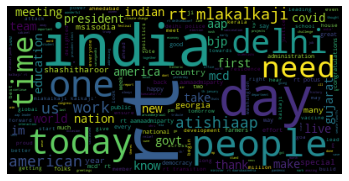

In [18]:
words = tweet_df['cleaned_tweets'].values 

wordcloud = WordCloud().generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

have to remove reserved words too :/
